# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Import Data**

In [ ]:
# loading the data from csv file to pandas dataframe
df = pd.read_csv('/content/car data (1).csv')

# **Understanding The Data**

In [ ]:
# inspecting the first 5 rows of the dataframe
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# checking the number of rows and columns
df.shape

(301, 9)

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# **Data Preprocessing**
# **Data Cleaning**
**1. Handling Missing Values**

In [ ]:
# checking the number of missing values
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


**2. Handling Duplicates**

In [ ]:
# Checking the numbers of duplicate rows
df.duplicated().sum()

np.int64(2)

In [ ]:
# Dropping duplicate rows
df.drop_duplicates(inplace=True)

# **Encoding the Categorical data**

In [ ]:
# checking the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        193
Individual    106
Name: count, dtype: int64
Transmission
Manual       260
Automatic     39
Name: count, dtype: int64


In [ ]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# **Splitting the data and Target**

In [ ]:
# Input Features / Independent Columns
X = df.drop(['Car_Name','Selling_Price'],axis=1)

# Output Feature / Target Column / Dependent Column
Y = df['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64


# **Splitting Training and Test data**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

#**Model Trainging**

**1. Linear Model**

In [ ]:
from sklearn.linear_model import LinearRegression

# Loading the Linear Regression model
lin_reg_model = LinearRegression()

# Training the Linear Regression model
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

**Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(Y_train, training_data_prediction)
mse = mean_squared_error(Y_train, training_data_prediction)
r2 = r2_score(Y_train, training_data_prediction)

print('MAE:', mae)
print('MSE:', mse)
print('R2 Score:', r2)

MAE: 1.187452343254544
MSE: 3.150842482797854
R2 Score: 0.8771123681040547


**Visualize the actual prices and Predicted prices**

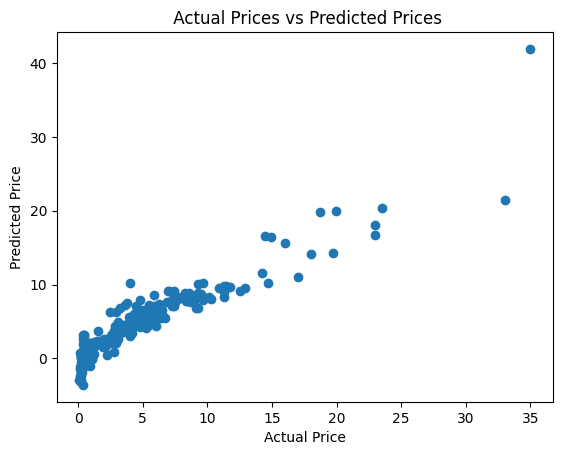

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# Prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, test_data_prediction)
mse = mean_squared_error(Y_test, test_data_prediction)
r2 = r2_score(Y_test, test_data_prediction)

print('MAE:', mae)
print('MSE:', mse)
print('R2 Score:', r2)

MAE: 0.9371695000840362
MSE: 2.3672019659637633
R2 Score: 0.8562516649197174


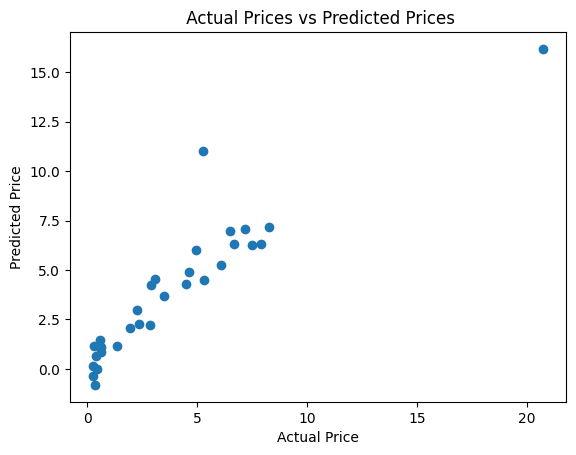

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

**2. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, Y_train)

DecisionTreeRegressor()

**Model Evaluation**

In [ ]:
# Predtion on Training data
training_data_prediction = dt_model.predict(X_train)

In [ ]:
mae = mean_absolute_error(Y_train, training_data_prediction)
mse = mean_squared_error(Y_train, training_data_prediction)
r2 = r2_score(Y_train, training_data_prediction)

print('MAE:', mae)
print('MSE:', mse)
print('R2 Score:', r2)

MAE: 0.0
MSE: 0.0
R2 Score: 1.0


In [ ]:
# Prediction on Test data
test_data_prediction = dt_model.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, test_data_prediction)
mse = mean_squared_error(Y_test, test_data_prediction)
r2 = r2_score(Y_test, test_data_prediction)

print('MAE:', mae)
print('MSE:', mse)
print('R2 Score:', r2)

MAE: 0.5356666666666668
MSE: 0.6011166666666667
R2 Score: 0.9634971915093173


**3. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, Y_train)

KNeighborsRegressor()

**Model Evaluation**

In [ ]:
# Prediction Training data
trainging_data_prediction = knn_model.predict(X_train)

In [ ]:
mae = mean_absolute_error(Y_train, trainging_data_prediction)
mse = mean_squared_error(Y_train, trainging_data_prediction)
r2 = r2_score(Y_train, trainging_data_prediction)

print('MAE:', mae)
print('MSE:', mse)
print('R2 Score:', r2)

MAE: 2.9269070631970258
MSE: 18.30616962081784
R2 Score: 0.2860316419911225


In [ ]:
# Prediction on Test data
test_data_prediction = knn_model.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, test_data_prediction)
mse = mean_squared_error(Y_test, test_data_prediction)
r2 = r2_score(Y_test, test_data_prediction)

print('MAE:', mae)
print('MSE:', mse)
print('R2 Score:', r2)

MAE: 3.1013333333333337
MSE: 19.589476533333332
R2 Score: -0.1895709268788437


**Save Train Model**

In [ ]:
import pickle

# save the trained pipeline using pickle
model_path = 'lin_reg_model.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(lin_reg_model, file)